In [934]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [935]:
%autoreload 2
%aimport sog1_helpers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import protfasta

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#plt.rcParams['text.usetex'] = True

plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

activity_col = "Activity_S3_1"

# 1. Obtain ortholog and NAC family tiles

In [936]:
basic_tiles = sog1_helpers.return_activities("Basic", pos_regex = "")
basic_tiles = basic_tiles[~basic_tiles["Description"].str.contains("_")]
basic_tiles["name"] = basic_tiles["Other"].str.split("_").str[0]
basic_tiles["name"] = basic_tiles["name"].str.replace("SOG1", "")
basic_tiles["name"] = basic_tiles["name"].str.strip()
basic_tiles

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name
0,Basic6.1,Q9LR74,MKILPVGSRFCPTDLGLVRLYLRNKVERNQSSFITTMDIH,586.178097,NaN,586.178097,Q9LR74
1,Basic6.2,Q9LR74,CPTDLGLVRLYLRNKVERNQSSFITTMDIHQDYPWLLPHV,2211.966071,2343.749322,2277.857696,Q9LR74
2,Basic6.3,Q9LR74,YLRNKVERNQSSFITTMDIHQDYPWLLPHVNNPLFNNNEW,NaN,NaN,NaN,Q9LR74
3,Basic6.4,Q9LR74,SSFITTMDIHQDYPWLLPHVNNPLFNNNEWYYFVPLTERG,573.518390,599.219717,586.369054,Q9LR74
4,Basic6.5,Q9LR74,QDYPWLLPHVNNPLFNNNEWYYFVPLTERGGKILSVHRKV,315.722705,392.863309,354.293007,Q9LR74
...,...,...,...,...,...,...,...
3012,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2
3013,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2
3014,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2
3015,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2


In [937]:
basic_tiles["Other"].value_counts()

Other
A4FVP                                                54
MarchantiaPolymorphaSOG1_Lib1                        50
Nelumbonucifera_A0A1U8ABV8_TAIR                      47
S.bicolor_Sobic.010G111800.2.p_Macovei               46
WT_e2fa                                              46
B.distachyon_Bradi1g43840.1.p_Macovei                46
PhyscomitriumPatens_PpSOG1a                          46
Q9SCK6                                               44
B.rapa_Brara.G00896.1.p_Macovei                      42
Q6NQK2                                               42
Nicotianatabacum(tobacco)_A0A1S3X2K2_TAIR            41
G.max_Glyma.10G204700.1.p_Macovei                    40
E.grandis_Eucgr.G02349.1.p_Macovei                   40
V.vinifera peptide_GSVIVT01011954001_Macovei         40
PopulusTrichocarpaSOG1_Lib1                          40
ZeaMays_ACL54469.1                                   39
OryzaSativa_ XP_015640881.1                          39
Amborellatrichopoda_W1NK30_TAIR           

In [938]:
sog1_orthologs = pd.read_csv("../data/sog1_orthologs.csv", sep = "\t")
sog1_orthologs["name"] = sog1_orthologs["Wild type sequences:"].str.split("_").str[0]
sog1_orthologs["name"] = sog1_orthologs["name"].str.replace("SOG1", "")
sog1_orthologs["name"] = sog1_orthologs["name"].str.strip()
ArTh_wt = "".join(pd.read_csv("../data/Sog1_AA_features.csv")["aa"])
sog1_orthologs.loc[15] = {"name" : "Q6NQK2", "Unnamed: 1" : ArTh_wt}
sog1_orthologs

,Wild type sequences:,Unnamed: 1,name
0,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNS...,B.rapa
1,S.bicolor_Sobic.010G111800.2.p_Macovei,MPRRFFFFAVDGSSGQMMTFLYFGFNDKEDMSTVRMKTTWIIDSQR...,S.bicolor
2,E.grandis_Eucgr.G02349.1.p_Macovei,MAGPSWLVDSHRIATKIRSASGASDPEKVKWKSNPTRACPNCQHVI...,E.grandis
3,V.vinifera peptide_GSVIVT01011954001_Macovei,MSWLVDSNRFATKIKNASGTRETERVKWKSNPSRACPNCQHIIDNS...,V.vinifera peptide
4,PopulusTrichocarpaSOG1_Lib1,MAGPWLVDGNRFATKIKSASSASNHERVAWKSDPCKTCPNCHHVID...,PopulusTrichocarpa
5,Nicotianatabacum(tobacco)_A0A1S3X2K2_TAIR,MCYRFRRPSWLVDSKRIATKIKSASGDPGAVNWKSNPTKACPNCQF...,Nicotianatabacum(tobacco)
6,G.max_Glyma.10G204700.1.p_Macovei,MAGPSWLVDKSRIATKIKNVSGTCGKVIWKSNPSRACPSCHHVIDN...,G.max
7,Selaginellamoellendorffii(spikemoss)_D8RBR5_TAIR,MSQAPQDWTGLPAGVKFDPNDKEILDHLAAKIGRGGKPHALIDEFI...,Selaginellamoellendorffii(spikemoss)
8,MarchantiaPolymorphaSOG1_Lib1,MKNRDHRDRWGRFMDQLVRQIDNATHQRNDAYSLAQDDTTALPGLE...,MarchantiaPolymorpha
9,PhyscomitriumPatensSOG1_Lib1,MDRVASNRILGASKLRCDNNAAAHVKLDSFPAGVRFDPSDEELLEH...,PhyscomitriumPatens


In [939]:
orthologs = basic_tiles[basic_tiles["name"].isin(sog1_orthologs["name"])]
orthologs

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name
471,BasicBrRa.1,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCH,372.197467,436.667606,404.432536,B.rapa
472,BasicBrRa.2,B.rapa_Brara.G00896.1.p_Macovei,NRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNSHEVD,NaN,NaN,NaN,B.rapa
473,BasicBrRa.3,B.rapa_Brara.G00896.1.p_Macovei,SDPCPTVWNTNPTRHCPNCHHVIDNSHEVDDWPGLPRGVK,765.501115,715.751065,740.626090,B.rapa
474,BasicBrRa.4,B.rapa_Brara.G00896.1.p_Macovei,NPTRHCPNCHHVIDNSHEVDDWPGLPRGVKFDPSDPEIIW,947.655601,961.930688,954.793145,B.rapa
475,BasicBrRa.5,B.rapa_Brara.G00896.1.p_Macovei,HVIDNSHEVDDWPGLPRGVKFDPSDPEIIWHLLAKTGSLG,540.798443,423.104489,481.951466,B.rapa
...,...,...,...,...,...,...,...
3012,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2
3013,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2
3014,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2
3015,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2


In [940]:
len(orthologs["Other"].value_counts())

16

In [941]:
nac_fam = basic_tiles[~basic_tiles["name"].isin(sog1_orthologs["name"])]
nac_fam

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name
0,Basic6.1,Q9LR74,MKILPVGSRFCPTDLGLVRLYLRNKVERNQSSFITTMDIH,586.178097,NaN,586.178097,Q9LR74
1,Basic6.2,Q9LR74,CPTDLGLVRLYLRNKVERNQSSFITTMDIHQDYPWLLPHV,2211.966071,2343.749322,2277.857696,Q9LR74
2,Basic6.3,Q9LR74,YLRNKVERNQSSFITTMDIHQDYPWLLPHVNNPLFNNNEW,NaN,NaN,NaN,Q9LR74
3,Basic6.4,Q9LR74,SSFITTMDIHQDYPWLLPHVNNPLFNNNEWYYFVPLTERG,573.518390,599.219717,586.369054,Q9LR74
4,Basic6.5,Q9LR74,QDYPWLLPHVNNPLFNNNEWYYFVPLTERGGKILSVHRKV,315.722705,392.863309,354.293007,Q9LR74
...,...,...,...,...,...,...,...
2970,BasicHSFA2.28,NaN,DMEMLFAAAIDDEANNSMPTKEEQCLEAMNVMMRDGNLEA,NaN,NaN,NaN,NaN
2971,BasicHSFA2.29,NaN,DDEANNSMPTKEEQCLEAMNVMMRDGNLEAALDVKVEDLV,NaN,NaN,NaN,NaN
2972,BasicHSFA2.30,NaN,KEEQCLEAMNVMMRDGNLEAALDVKVEDLVGSPLDWDSQD,NaN,NaN,NaN,NaN
2973,BasicHSFA2.31,NaN,VMMRDGNLEAALDVKVEDLVGSPLDWDSQDLHDMVDQMGF,NaN,NaN,NaN,NaN


# 2. Orthologs

## 1. Aligning

In [942]:
sog1_orthologs[["name", "Unnamed: 1"]]

,name,Unnamed: 1
0,B.rapa,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNS...
1,S.bicolor,MPRRFFFFAVDGSSGQMMTFLYFGFNDKEDMSTVRMKTTWIIDSQR...
2,E.grandis,MAGPSWLVDSHRIATKIRSASGASDPEKVKWKSNPTRACPNCQHVI...
3,V.vinifera peptide,MSWLVDSNRFATKIKNASGTRETERVKWKSNPSRACPNCQHIIDNS...
4,PopulusTrichocarpa,MAGPWLVDGNRFATKIKSASSASNHERVAWKSDPCKTCPNCHHVID...
5,Nicotianatabacum(tobacco),MCYRFRRPSWLVDSKRIATKIKSASGDPGAVNWKSNPTKACPNCQF...
6,G.max,MAGPSWLVDKSRIATKIKNVSGTCGKVIWKSNPSRACPSCHHVIDN...
7,Selaginellamoellendorffii(spikemoss),MSQAPQDWTGLPAGVKFDPNDKEILDHLAAKIGRGGKPHALIDEFI...
8,MarchantiaPolymorpha,MKNRDHRDRWGRFMDQLVRQIDNATHQRNDAYSLAQDDTTALPGLE...
9,PhyscomitriumPatens,MDRVASNRILGASKLRCDNNAAAHVKLDSFPAGVRFDPSDEELLEH...


In [943]:
protfasta.write_fasta(dict(zip(sog1_orthologs["name"], sog1_orthologs["Unnamed: 1"])), "../data/sog1_orthologs.fasta")

In [944]:
! mafft --auto --quiet ../data/sog1_orthologs.fasta > ../data/sog1_orthologs_aligned.fasta

## 2. Plotting activity trace

In [945]:
orthologs["tile_num"] = orthologs["Description"].str.split(".").str[-1].astype(int)
orthologs["Start"] = 10 * orthologs["tile_num"] - 9
orthologs["mid"] = orthologs["Start"] + 20
orthologs["End"] = orthologs["Start"] + 40
orthologs["Description_name"] = orthologs["Description"].str.split(".").str[0]
orthologs

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name,tile_num,Start,mid,End,Description_name
471,BasicBrRa.1,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCH,372.197467,436.667606,404.432536,B.rapa,1,1,21,41,BasicBrRa
472,BasicBrRa.2,B.rapa_Brara.G00896.1.p_Macovei,NRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNSHEVD,NaN,NaN,NaN,B.rapa,2,11,31,51,BasicBrRa
473,BasicBrRa.3,B.rapa_Brara.G00896.1.p_Macovei,SDPCPTVWNTNPTRHCPNCHHVIDNSHEVDDWPGLPRGVK,765.501115,715.751065,740.626090,B.rapa,3,21,41,61,BasicBrRa
474,BasicBrRa.4,B.rapa_Brara.G00896.1.p_Macovei,NPTRHCPNCHHVIDNSHEVDDWPGLPRGVKFDPSDPEIIW,947.655601,961.930688,954.793145,B.rapa,4,31,51,71,BasicBrRa
475,BasicBrRa.5,B.rapa_Brara.G00896.1.p_Macovei,HVIDNSHEVDDWPGLPRGVKFDPSDPEIIWHLLAKTGSLG,540.798443,423.104489,481.951466,B.rapa,5,41,61,81,BasicBrRa
...,...,...,...,...,...,...,...,...,...,...,...,...
3012,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2,38,371,391,411,BasicArTh
3013,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2,39,381,401,421,BasicArTh
3014,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2,40,391,411,431,BasicArTh
3015,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2,41,401,421,441,BasicArTh


In [946]:
max(orthologs[activity_col])

5758.8846508233355

In [947]:
orthologs["normalized_" + activity_col] = orthologs[activity_col] / max(orthologs[activity_col])
orthologs

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name,tile_num,Start,mid,End,Description_name,normalized_Activity_S3_1
471,BasicBrRa.1,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCH,372.197467,436.667606,404.432536,B.rapa,1,1,21,41,BasicBrRa,0.064630
472,BasicBrRa.2,B.rapa_Brara.G00896.1.p_Macovei,NRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNSHEVD,NaN,NaN,NaN,B.rapa,2,11,31,51,BasicBrRa,NaN
473,BasicBrRa.3,B.rapa_Brara.G00896.1.p_Macovei,SDPCPTVWNTNPTRHCPNCHHVIDNSHEVDDWPGLPRGVK,765.501115,715.751065,740.626090,B.rapa,3,21,41,61,BasicBrRa,0.132925
474,BasicBrRa.4,B.rapa_Brara.G00896.1.p_Macovei,NPTRHCPNCHHVIDNSHEVDDWPGLPRGVKFDPSDPEIIW,947.655601,961.930688,954.793145,B.rapa,4,31,51,71,BasicBrRa,0.164555
475,BasicBrRa.5,B.rapa_Brara.G00896.1.p_Macovei,HVIDNSHEVDDWPGLPRGVKFDPSDPEIIWHLLAKTGSLG,540.798443,423.104489,481.951466,B.rapa,5,41,61,81,BasicBrRa,0.093907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2,38,371,391,411,BasicArTh,0.104457
3013,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2,39,381,401,421,BasicArTh,0.088270
3014,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2,40,391,411,431,BasicArTh,0.340424
3015,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2,41,401,421,441,BasicArTh,0.384858


In [948]:
def plot_one_org_heatmap(org, ax):
    one_org_df = orthologs[orthologs["Description"].str.contains(org)]#[["mid", activity_col]]
    #sns.heatmap(one_org_df[["normalized_" + activity_col]].T, cmap = "Reds", ax = ax, vmin = 0, vmax = 1, cbar = False)
    sns.heatmap(one_org_df[["normalized_" + activity_col]].T, cmap = "Reds", ax = ax, cbar = False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(org[5:], fontsize = 'xx-small', rotation = 0, va = 'center', labelpad = 10)

In [949]:
len(orthologs["Description_name"].unique())

16

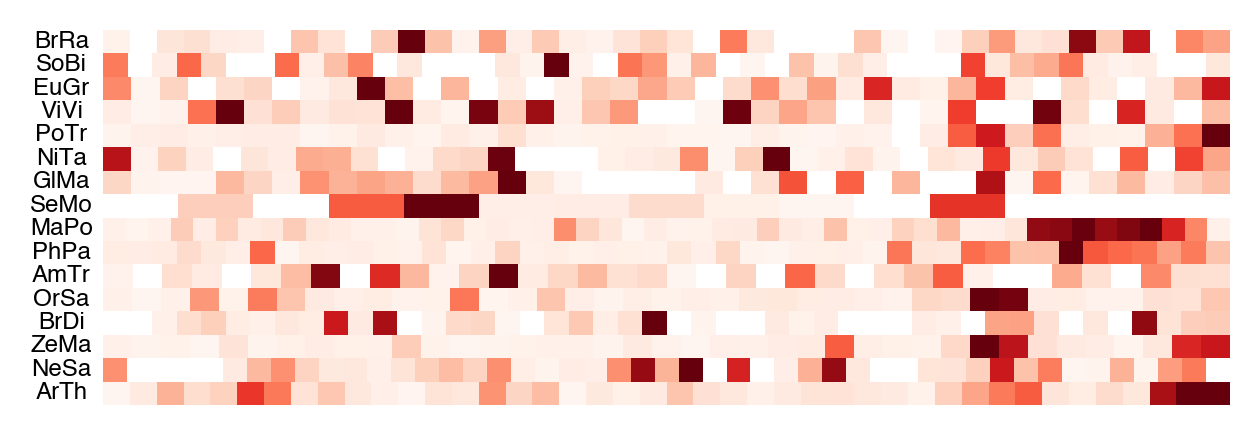

In [950]:
fig, axs = plt.subplots(len(orthologs["Description_name"].unique()), 1, figsize = (4, 1.25), dpi = 300)

i = 0
for descrip in orthologs["Description_name"].unique():
    plot_one_org_heatmap(descrip, axs[i])
    i += 1

plt.tight_layout(pad = 0)

# Try 2

In [951]:
orthologs

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name,tile_num,Start,mid,End,Description_name,normalized_Activity_S3_1
471,BasicBrRa.1,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCH,372.197467,436.667606,404.432536,B.rapa,1,1,21,41,BasicBrRa,0.064630
472,BasicBrRa.2,B.rapa_Brara.G00896.1.p_Macovei,NRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNSHEVD,NaN,NaN,NaN,B.rapa,2,11,31,51,BasicBrRa,NaN
473,BasicBrRa.3,B.rapa_Brara.G00896.1.p_Macovei,SDPCPTVWNTNPTRHCPNCHHVIDNSHEVDDWPGLPRGVK,765.501115,715.751065,740.626090,B.rapa,3,21,41,61,BasicBrRa,0.132925
474,BasicBrRa.4,B.rapa_Brara.G00896.1.p_Macovei,NPTRHCPNCHHVIDNSHEVDDWPGLPRGVKFDPSDPEIIW,947.655601,961.930688,954.793145,B.rapa,4,31,51,71,BasicBrRa,0.164555
475,BasicBrRa.5,B.rapa_Brara.G00896.1.p_Macovei,HVIDNSHEVDDWPGLPRGVKFDPSDPEIIWHLLAKTGSLG,540.798443,423.104489,481.951466,B.rapa,5,41,61,81,BasicBrRa,0.093907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2,38,371,391,411,BasicArTh,0.104457
3013,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2,39,381,401,421,BasicArTh,0.088270
3014,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2,40,391,411,431,BasicArTh,0.340424
3015,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2,41,401,421,441,BasicArTh,0.384858


In [952]:
sog1_orthologs

,Wild type sequences:,Unnamed: 1,name
0,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNS...,B.rapa
1,S.bicolor_Sobic.010G111800.2.p_Macovei,MPRRFFFFAVDGSSGQMMTFLYFGFNDKEDMSTVRMKTTWIIDSQR...,S.bicolor
2,E.grandis_Eucgr.G02349.1.p_Macovei,MAGPSWLVDSHRIATKIRSASGASDPEKVKWKSNPTRACPNCQHVI...,E.grandis
3,V.vinifera peptide_GSVIVT01011954001_Macovei,MSWLVDSNRFATKIKNASGTRETERVKWKSNPSRACPNCQHIIDNS...,V.vinifera peptide
4,PopulusTrichocarpaSOG1_Lib1,MAGPWLVDGNRFATKIKSASSASNHERVAWKSDPCKTCPNCHHVID...,PopulusTrichocarpa
5,Nicotianatabacum(tobacco)_A0A1S3X2K2_TAIR,MCYRFRRPSWLVDSKRIATKIKSASGDPGAVNWKSNPTKACPNCQF...,Nicotianatabacum(tobacco)
6,G.max_Glyma.10G204700.1.p_Macovei,MAGPSWLVDKSRIATKIKNVSGTCGKVIWKSNPSRACPSCHHVIDN...,G.max
7,Selaginellamoellendorffii(spikemoss)_D8RBR5_TAIR,MSQAPQDWTGLPAGVKFDPNDKEILDHLAAKIGRGGKPHALIDEFI...,Selaginellamoellendorffii(spikemoss)
8,MarchantiaPolymorphaSOG1_Lib1,MKNRDHRDRWGRFMDQLVRQIDNATHQRNDAYSLAQDDTTALPGLE...,MarchantiaPolymorpha
9,PhyscomitriumPatensSOG1_Lib1,MDRVASNRILGASKLRCDNNAAAHVKLDSFPAGVRFDPSDEELLEH...,PhyscomitriumPatens


In [953]:
sog1_orthologs["Unnamed: 1" ].str.rfind("SQ")

0     431
1     472
2     414
3     416
4     413
5     418
6     407
7       1
8     500
9     478
10    391
11    402
12    465
13    397
14    467
15    435
Name: Unnamed: 1, dtype: int64

In [954]:
def df_aligned_on_motif(motif_align, sog1_orthologs, orthologs, reverse = False):
    if reverse:
        sog1_orthologs["motif_pos"]=sog1_orthologs["Unnamed: 1" ].str.rfind(motif_align)
    else:
        sog1_orthologs["motif_pos"]=sog1_orthologs["Unnamed: 1" ].str.find(motif_align)
    sog1_orthologs["len"] = sog1_orthologs["Unnamed: 1"].str.len()
    sog1_orthologs = sog1_orthologs.sort_values(by = "len")

    orthologs_relative_pos = pd.merge(orthologs, sog1_orthologs[["name", "motif_pos", "len"]])
    orthologs_relative_pos["adj_mid"] = orthologs_relative_pos["mid"] - orthologs_relative_pos["motif_pos"]
    
    heatmap_df = orthologs_relative_pos[["Description_name", "normalized_Activity_S3_1", "adj_mid"]]
    heatmap_df = heatmap_df.set_index('adj_mid')
    return orthologs_relative_pos, heatmap_df

In [955]:
motif_align = "RWHKTG"
orthologs_relative_pos, heatmap_df = df_aligned_on_motif(motif_align, sog1_orthologs, orthologs)
heatmap_df

,Description_name,normalized_Activity_S3_1
adj_mid,,
-125,BasicBrRa,0.064630
-115,BasicBrRa,NaN
-105,BasicBrRa,0.132925
-95,BasicBrRa,0.164555
-85,BasicBrRa,0.093907
...,...,...
242,BasicArTh,0.104457
252,BasicArTh,0.088270
262,BasicArTh,0.340424


In [956]:
max(heatmap_df.index)

348

In [957]:
min(heatmap_df.index)

-161

In [958]:
end_order = orthologs_relative_pos[["Description_name", "adj_mid"]].groupby("Description_name").max().sort_values(by = "adj_mid")
end_order = end_order.index

In [959]:
len_asc_order = orthologs_relative_pos[["Description_name", "len"]].drop_duplicates().sort_values(by = "len", ascending = True)["Description_name"]

In [960]:
heatmap_df[heatmap_df["Description_name"] == "BasicEuGr"][["normalized_Activity_S3_1"]].index[0]

-128

In [961]:
from scipy.ndimage.filters import gaussian_filter

<Axes: xlabel='adj_mid'>

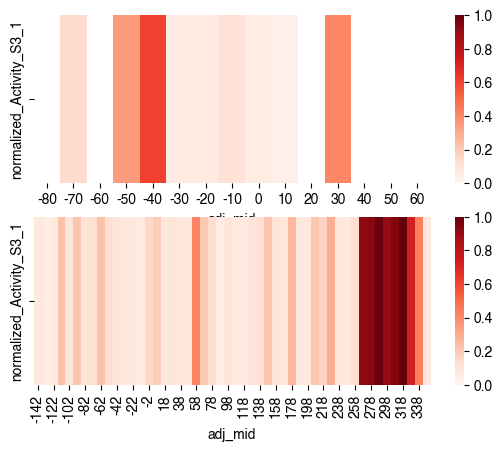

In [962]:
fig, axs = plt.subplots(2, 1)

df = heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"]
df = df[["normalized_Activity_S3_1"]].T

sns.heatmap(df, vmin = 0, vmax = 1, cmap = "Reds", ax = axs[0])
#axs[0].set_xlim(1, 10)

df = heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"]
df = df[["normalized_Activity_S3_1"]].T
sns.heatmap(df, vmin = 0, vmax = 1, cmap = "Reds", ax = axs[1])

<Axes: xlabel='adj_mid'>

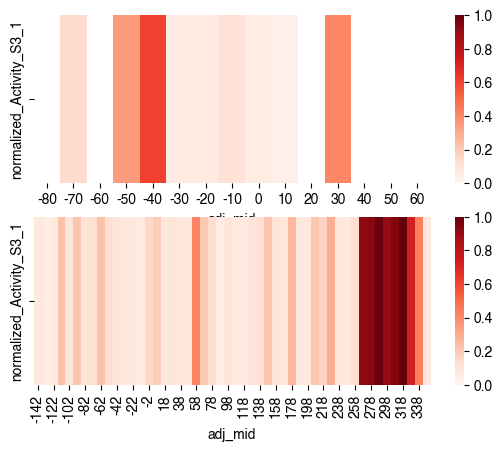

In [963]:
fig, axs = plt.subplots(2, 1, sharex= False)

df = heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"]
df = df[["normalized_Activity_S3_1"]].T

sns.heatmap(df, vmin = 0, vmax = 1, cmap = "Reds", ax = axs[0])


df = heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"]
df = df[["normalized_Activity_S3_1"]].T
sns.heatmap(df, vmin = 0, vmax = 1, cmap = "Reds", ax = axs[1])

In [964]:
df.T

,normalized_Activity_S3_1
adj_mid,
-142,0.073415
-132,0.057330
-122,0.071634
-112,0.231455
-102,0.098069
-92,0.216115
-82,0.106944
-72,0.122547
-62,0.233168


In [965]:
df.T.interpolate()

,normalized_Activity_S3_1
adj_mid,
-142,0.073415
-132,0.057330
-122,0.071634
-112,0.231455
-102,0.098069
-92,0.216115
-82,0.106944
-72,0.122547
-62,0.233168


<Axes: xlabel='adj_mid'>

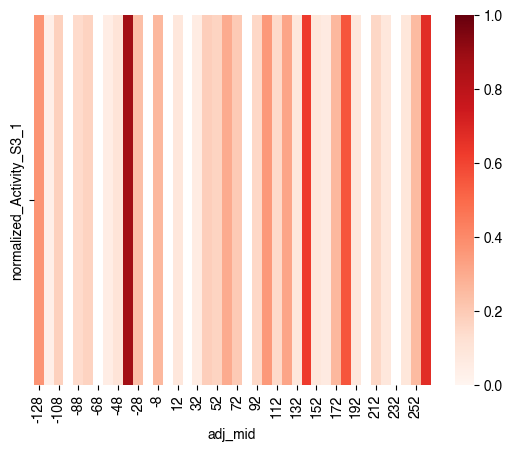

In [966]:
fig, ax = plt.subplots()
df = heatmap_df[heatmap_df["Description_name"] == "BasicEuGr"]
df = df[["normalized_Activity_S3_1"]].T

sns.heatmap(df, vmin = 0, vmax = 1, cmap = "Reds", ax = ax)

In [967]:
mapping = orthologs[["Description_name", "name"]].drop_duplicates()
mapping_dict = dict(zip(mapping["Description_name"], mapping["name"]))
mapping_dict["BasicArTh"] = "A.thaliana"
mapping_dict["BasicPoTr"] = "P.Trichocarpa"
mapping_dict["BasicNiTa"] = "N.Tabacaum"
mapping_dict["BasicSeMo"] = "S.Moellendorffii"
mapping_dict["BasicMaPo"] = "M.Polymorpha"
mapping_dict["BasicPhPa"] = "P.Patens"
mapping_dict["BasicAmTr"] = "A.Trichopoda"
mapping_dict["BasicOrSa"] = "O.Sativa"
mapping_dict["BasicZeMa"] = "Z.Mays"
mapping_dict["BasicNeSa"] = "N.Nucifera"

In [968]:
heatmap_df

,Description_name,normalized_Activity_S3_1
adj_mid,,
-125,BasicBrRa,0.064630
-115,BasicBrRa,NaN
-105,BasicBrRa,0.132925
-95,BasicBrRa,0.164555
-85,BasicBrRa,0.093907
...,...,...
242,BasicArTh,0.104457
252,BasicArTh,0.088270
262,BasicArTh,0.340424


In [969]:
def plot_one_trace(descrip_name, ax, heatmap_df, last = False, plot_min = -161, plot_max = 348, interpolate = True):
    x_min = heatmap_df[heatmap_df["Description_name"] == descrip_name][["normalized_Activity_S3_1"]].index[0]
    x_max = heatmap_df[heatmap_df["Description_name"] == descrip_name][["normalized_Activity_S3_1"]].index[-1]

    if interpolate:
        ax.imshow(heatmap_df[heatmap_df["Description_name"] == descrip_name][["normalized_Activity_S3_1"]].interpolate().T,interpolation="gaussian", cmap = "Reds", vmin = 0, vmax = 1, extent = [x_min-5, x_max+5, 0, 20])
    else:
        ax.imshow(heatmap_df[heatmap_df["Description_name"] == descrip_name][["normalized_Activity_S3_1"]].T,interpolation=None, cmap = "Reds", vmin = 0, vmax = 1, extent = [x_min-5, x_max+5, 0, 20])

    
    ax.set_xlim(plot_min, plot_max)
    ax.set_yticks([])    
    ax.set_xticks([])    
    sns.despine(bottom = True, left = True)
    ax.set_ylabel(mapping_dict[descrip_name], rotation = 0, fontsize = 'small', va = 'center', ha = 'right', labelpad = 5)
    #ax.axvline(0)

In [970]:
heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"]

,Description_name,normalized_Activity_S3_1
adj_mid,,
-80,BasicSeMo,NaN
-70,BasicSeMo,0.143188
-60,BasicSeMo,NaN
-50,BasicSeMo,0.345645
-40,BasicSeMo,0.610632
-30,BasicSeMo,0.061530
-20,BasicSeMo,0.065298
-10,BasicSeMo,0.116835
0,BasicSeMo,0.056804


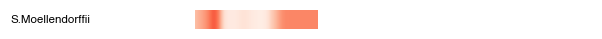

In [971]:
fig, ax = plt.subplots()
plot_one_trace("BasicSeMo", ax, heatmap_df, last = False)

In [972]:
# fig, ax = plt.subplots()
# plot_one_trace("BasicEuGr", ax, last = True)

In [973]:
# fig, ax = plt.subplots()
# plot_one_trace("BasicSeMo", ax, last = True)
# ax.set_xticks([0])

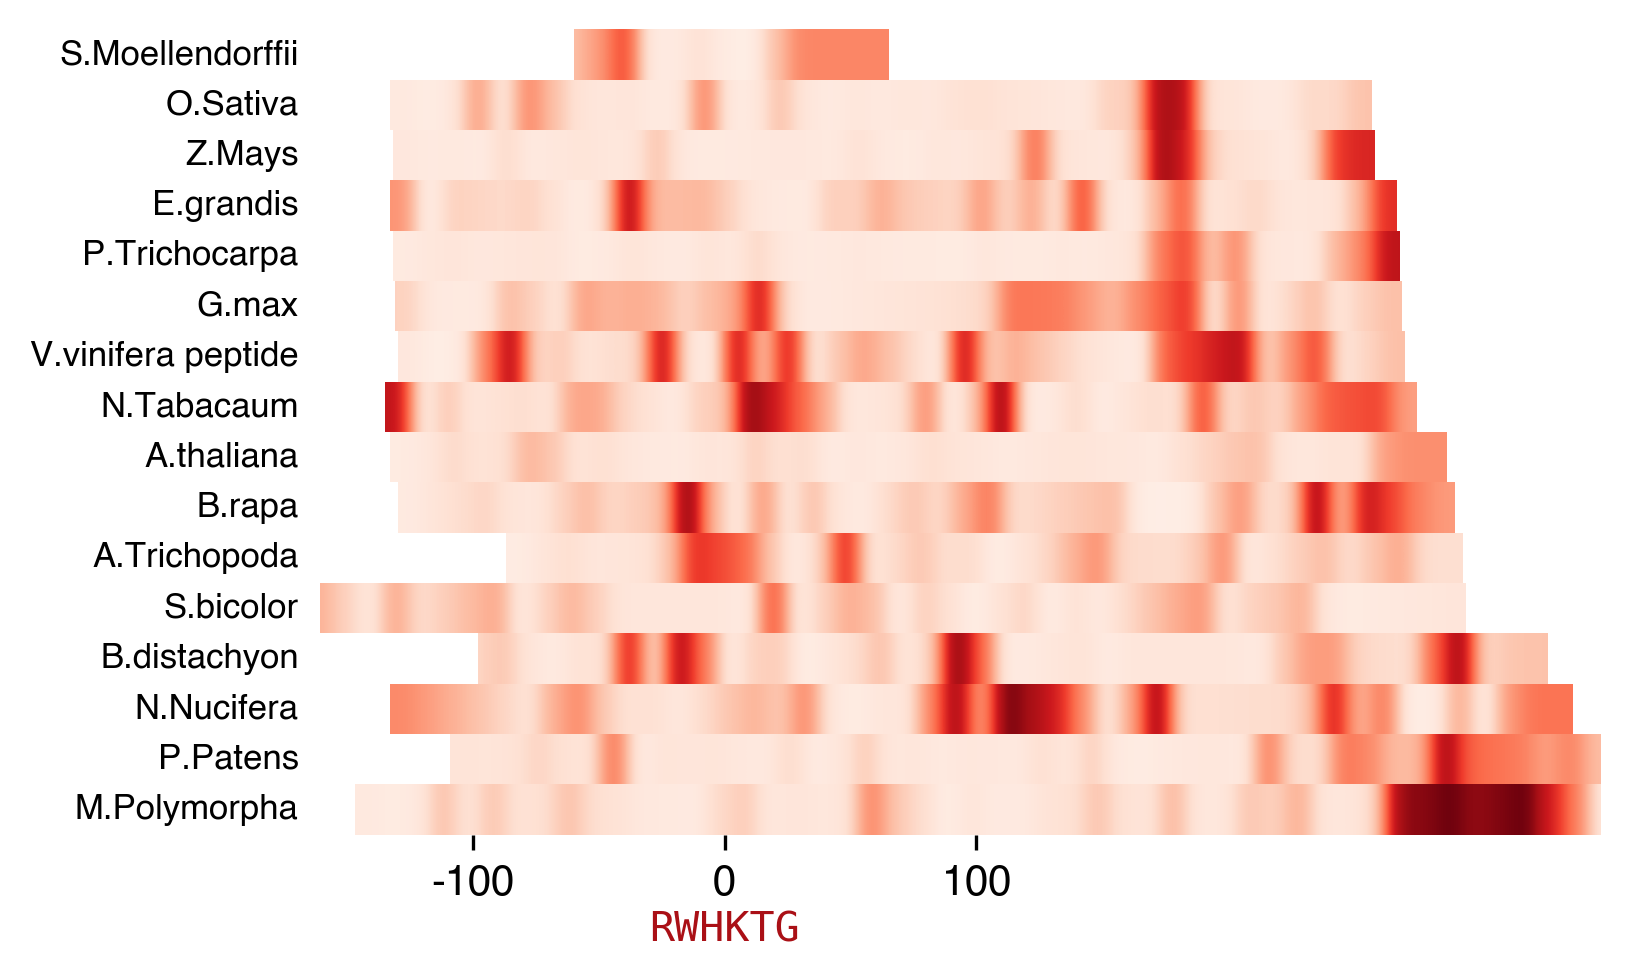

In [974]:
fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (6,3), sharex = True, dpi = 300)

for name, ax in zip(end_order, axs):

    plot_one_trace(name, ax, heatmap_df, last)
    
    if name != "BasicMaPo":
        ax.set_xticks([])

axs[-1].set_xticks([-100, 0, 100])
axs[-1].set_xticklabels([-100, 0, 100])
        
axs[-1].text(x = 0, y = -30, va = "top", ha = "center", s = motif_align, color = sns.color_palette("Reds")[-1], font = 'monospace')

plt.tight_layout(pad = 0)

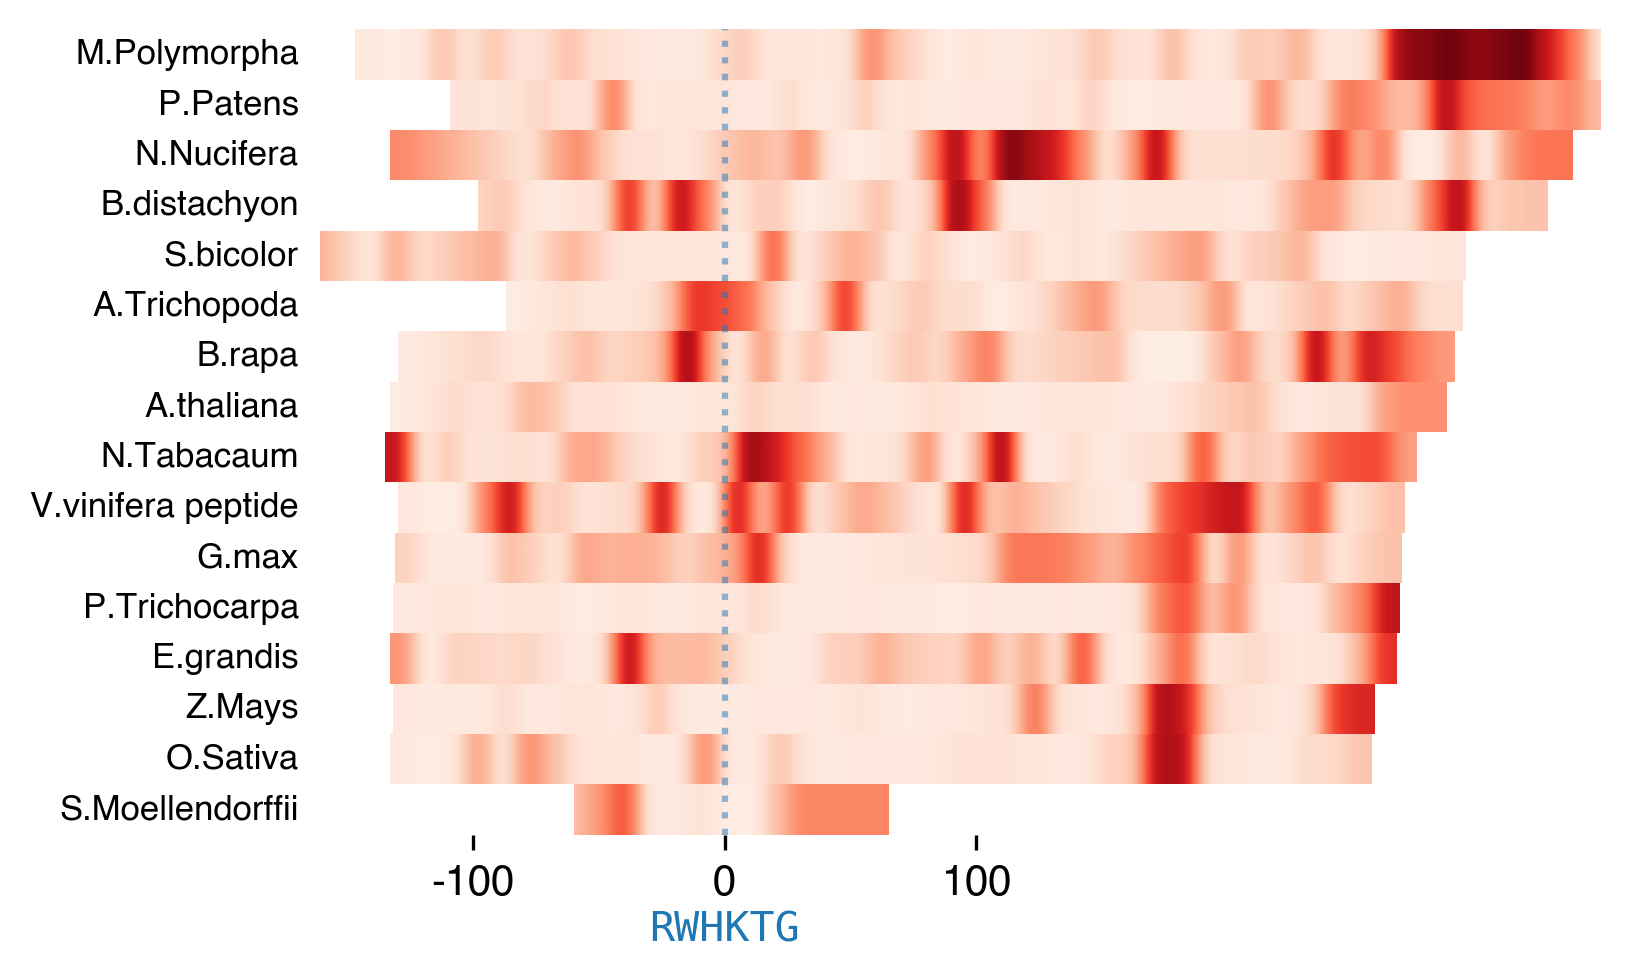

In [980]:
start_order = orthologs_relative_pos[["Description_name", "adj_mid"]].groupby("Description_name").max().sort_values(by = "adj_mid", ascending = False)
start_order = start_order.index

fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (6,3), sharex = True, dpi = 300)

for name, ax in zip(start_order, axs):

    plot_one_trace(name, ax, heatmap_df, last)
    
    if name != "BasicMaPo":
        ax.set_xticks([])

    ax.axvline(0, alpha = 0.5, linestyle = 'dotted')

axs[-1].set_xticks([-100, 0, 100])
axs[-1].set_xticklabels([-100, 0, 100])
        
axs[-1].text(x = 0, y = -30, va = "top", ha = "center", s = motif_align, color = sns.color_palette("tab10")[0], font = 'monospace')

plt.tight_layout(pad = 0)
plt.savefig("../output/figures/orthologs_DBD.png")

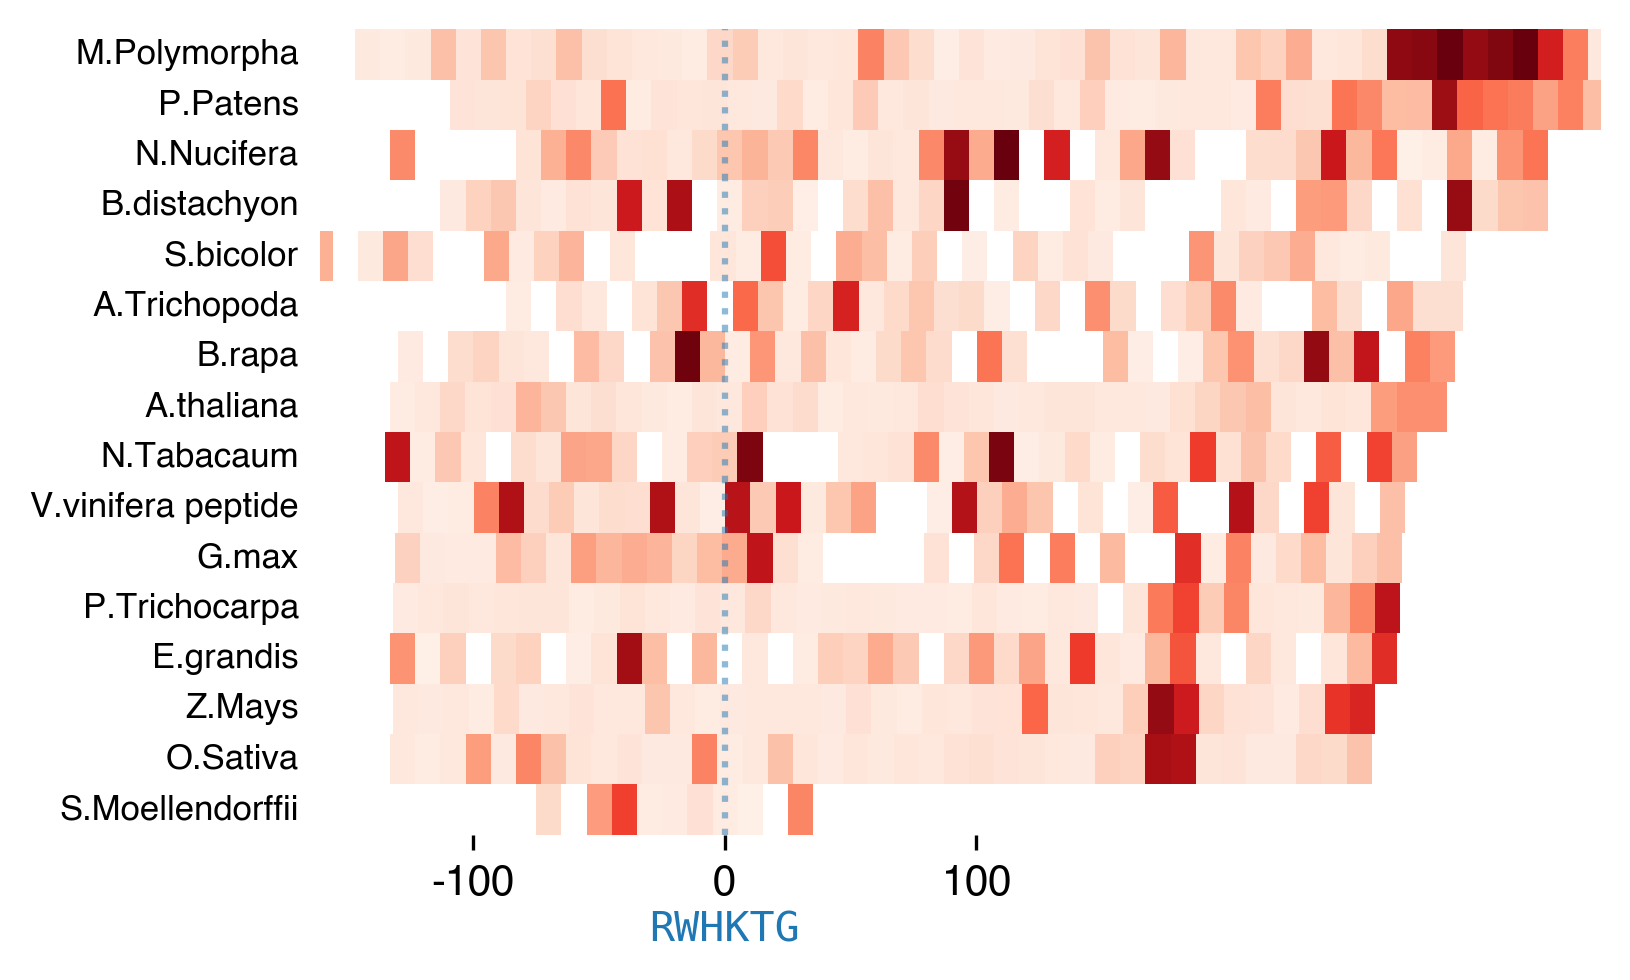

In [976]:
start_order = orthologs_relative_pos[["Description_name", "adj_mid"]].groupby("Description_name").max().sort_values(by = "adj_mid", ascending = False)
start_order = start_order.index

fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (6,3), sharex = True, dpi = 300)

for name, ax in zip(start_order, axs):

    plot_one_trace(name, ax, heatmap_df, last, interpolate = None)
    
    if name != "BasicMaPo":
        ax.set_xticks([])

    ax.axvline(0, alpha = 0.5, linestyle = 'dotted')

axs[-1].set_xticks([-100, 0, 100])
axs[-1].set_xticklabels([-100, 0, 100])
        
axs[-1].text(x = 0, y = -30, va = "top", ha = "center", s = motif_align, color = sns.color_palette("tab10")[0], font = 'monospace')

plt.tight_layout(pad = 0)

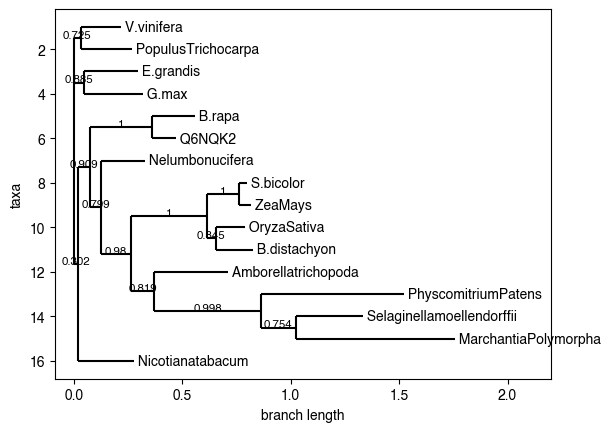

<Figure size 640x480 with 0 Axes>

In [979]:
from Bio import Phylo

# Example: Read a Newick formatted tree
tree = Phylo.read("../data/sog1_orthologs.tree", "newick")

# Show the tree
ax = Phylo.draw(tree)
sns.despine(ax = ax);

# Align on last SQE or SQD

In [925]:
motif_align = "SQ"
orthologs_relative_pos, heatmap_df = df_aligned_on_motif(motif_align, sog1_orthologs, orthologs, reverse=True)
orthologs_relative_pos

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name,tile_num,Start,mid,End,Description_name,normalized_Activity_S3_1,motif_pos,len,adj_mid
0,BasicBrRa.1,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCH,372.197467,436.667606,404.432536,B.rapa,1,1,21,41,BasicBrRa,0.064630,431,445,-410
1,BasicBrRa.2,B.rapa_Brara.G00896.1.p_Macovei,NRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNSHEVD,NaN,NaN,NaN,B.rapa,2,11,31,51,BasicBrRa,NaN,431,445,-400
2,BasicBrRa.3,B.rapa_Brara.G00896.1.p_Macovei,SDPCPTVWNTNPTRHCPNCHHVIDNSHEVDDWPGLPRGVK,765.501115,715.751065,740.626090,B.rapa,3,21,41,61,BasicBrRa,0.132925,431,445,-390
3,BasicBrRa.4,B.rapa_Brara.G00896.1.p_Macovei,NPTRHCPNCHHVIDNSHEVDDWPGLPRGVKFDPSDPEIIW,947.655601,961.930688,954.793145,B.rapa,4,31,51,71,BasicBrRa,0.164555,431,445,-380
4,BasicBrRa.5,B.rapa_Brara.G00896.1.p_Macovei,HVIDNSHEVDDWPGLPRGVKFDPSDPEIIWHLLAKTGSLG,540.798443,423.104489,481.951466,B.rapa,5,41,61,81,BasicBrRa,0.093907,431,445,-370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,BasicArTh.38,Q6NQK2,GSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQ,601.553077,3400.972046,2001.262561,Q6NQK2,38,371,391,411,BasicArTh,0.104457,435,449,-44
647,BasicArTh.39,Q6NQK2,SGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIE,508.338058,1512.228706,1010.283382,Q6NQK2,39,381,401,421,BasicArTh,0.088270,435,449,-34
648,BasicArTh.40,Q6NQK2,IADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLS,1960.462356,1783.792784,1872.127570,Q6NQK2,40,391,411,431,BasicArTh,0.340424,435,449,-24
649,BasicArTh.41,Q6NQK2,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2216.350444,2335.951103,2276.150773,Q6NQK2,41,401,421,441,BasicArTh,0.384858,435,449,-14


In [926]:
orthologs_relative_pos[orthologs_relative_pos["Description_name"] == "BasicPhPa"]

,Description,Other,tile,Activity_S3_1,Activity_S3_2,lib2_avg,name,tile_num,Start,mid,End,Description_name,normalized_Activity_S3_1,motif_pos,len,adj_mid
354,BasicPhPa.1,PhyscomitriumPatens_PpSOG1a,MDRVASNRILGASKLRCDNNAAAHVKLDSFPAGVRFDPSD,580.941812,4003.164263,2292.053038,PhyscomitriumPatens,1,1,21,41,BasicPhPa,0.100877,478,483,-457
355,BasicPhPa.2,PhyscomitriumPatens_PpSOG1a,GASKLRCDNNAAAHVKLDSFPAGVRFDPSDEELLEHLAAK,551.331077,919.873169,735.602123,PhyscomitriumPatens,2,11,31,51,BasicPhPa,0.095736,478,483,-447
356,BasicPhPa.3,PhyscomitriumPatens_PpSOG1a,AAAHVKLDSFPAGVRFDPSDEELLEHLAAKIGRSSRKPHP,600.567519,NaN,600.567519,PhyscomitriumPatens,3,21,41,61,BasicPhPa,0.104285,478,483,-437
357,BasicPhPa.4,PhyscomitriumPatens_PpSOG1a,PAGVRFDPSDEELLEHLAAKIGRSSRKPHPFLDEFIHTLV,965.666750,NaN,965.666750,PhyscomitriumPatens,4,31,51,71,BasicPhPa,0.167683,478,483,-427
358,BasicPhPa.5,PhyscomitriumPatens_PpSOG1a,EELLEHLAAKIGRSSRKPHPFLDEFIHTLVEEDGICRTHP,662.372165,4035.944799,2349.158482,PhyscomitriumPatens,5,41,61,81,BasicPhPa,0.115017,478,483,-417
359,BasicPhPa.6,PhyscomitriumPatens_PpSOG1a,IGRSSRKPHPFLDEFIHTLVEEDGICRTHPENLPGVKKDG,509.541059,1385.876521,947.708790,PhyscomitriumPatens,6,51,71,91,BasicPhPa,0.088479,478,483,-407
360,BasicPhPa.7,PhyscomitriumPatens_PpSOG1a,FLDEFIHTLVEEDGICRTHPENLPGVKKDGSSCHYFHRPS,2731.730856,550.967106,1641.348981,PhyscomitriumPatens,7,61,81,101,BasicPhPa,0.474351,478,483,-397
361,BasicPhPa.8,PhyscomitriumPatens_PpSOG1a,EEDGICRTHPENLPGVKKDGSSCHYFHRPSMAYTTGTRKR,322.380469,348.549646,335.465058,PhyscomitriumPatens,8,71,91,111,BasicPhPa,0.055980,478,483,-387
362,BasicPhPa.9,PhyscomitriumPatens_PpSOG1a,ENLPGVKKDGSSCHYFHRPSMAYTTGTRKRRKIQTDDVPD,578.602518,1037.702447,808.152482,PhyscomitriumPatens,9,81,101,121,BasicPhPa,0.100471,478,483,-377
363,BasicPhPa.10,PhyscomitriumPatens_PpSOG1a,SSCHYFHRPSMAYTTGTRKRRKIQTDDVPDGGTDVRWHKT,507.303290,791.970449,649.636869,PhyscomitriumPatens,10,91,111,131,BasicPhPa,0.088091,478,483,-367


In [927]:
min(heatmap_df.index)

-479

In [928]:
max(heatmap_df.index)

160

In [929]:
heatmap_df.reset_index().groupby("Description_name").max().sort_values(by = "adj_mid").index

Index(['BasicPhPa', 'BasicViVi', 'BasicArTh', 'BasicEuGr', 'BasicPoTr',
       'BasicOrSa', 'BasicSoBi', 'BasicAmTr', 'BasicBrRa', 'BasicNiTa',
       'BasicGlMa', 'BasicZeMa', 'BasicBrDi', 'BasicMaPo', 'BasicNeSa',
       'BasicSeMo'],
      dtype='object', name='Description_name')

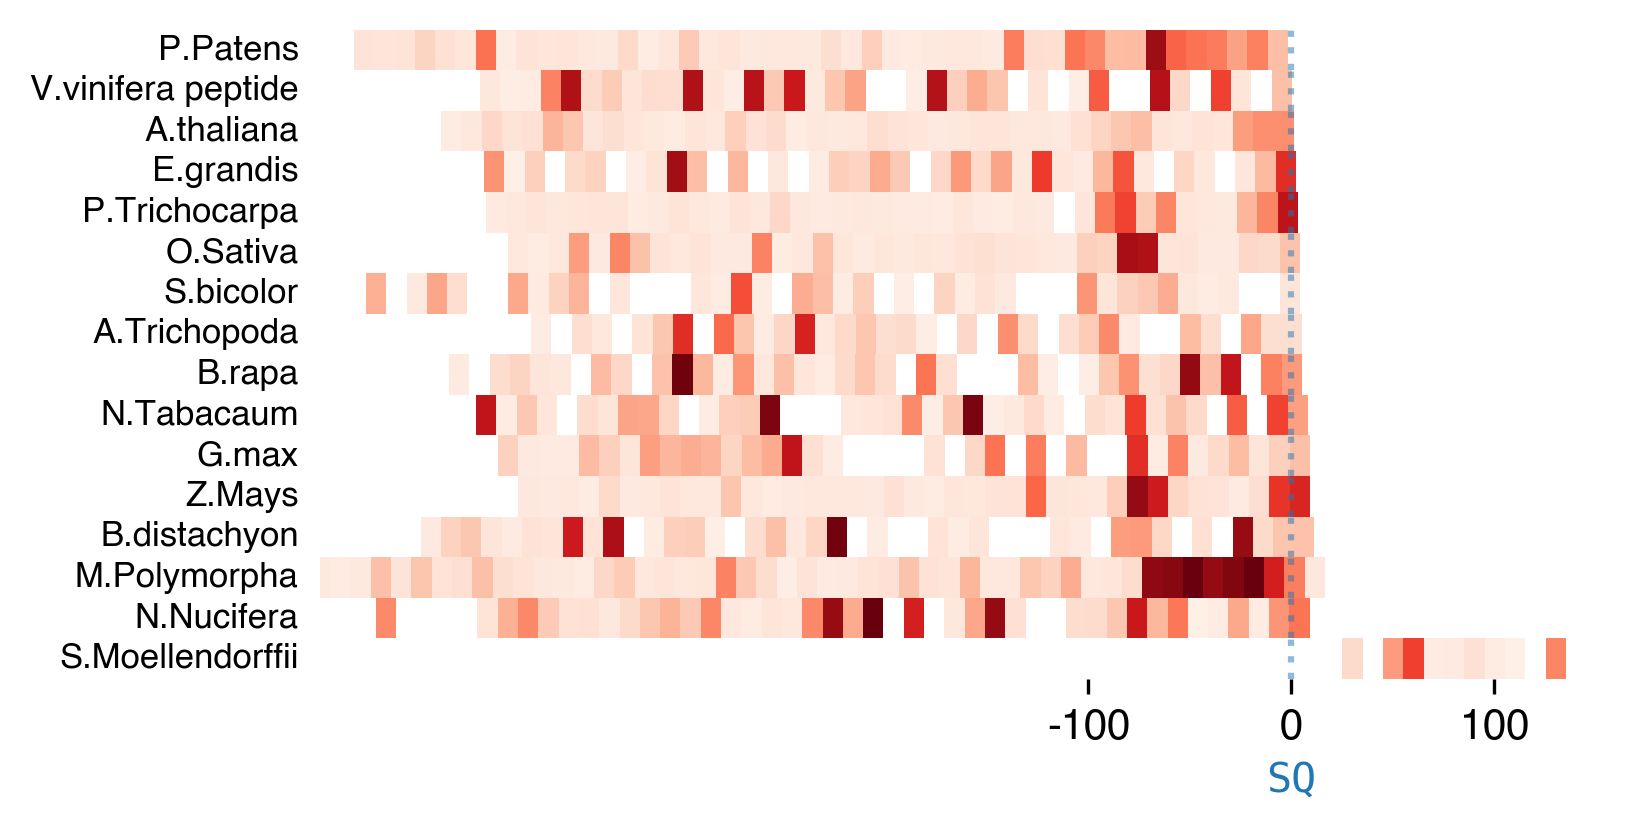

In [932]:
fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (10,2.5), sharex = True, dpi = 300)


end_order = heatmap_df.reset_index().groupby("Description_name").max().sort_values(by = "adj_mid").index

for name, ax in zip(end_order, axs):
    plot_one_trace(name, ax, heatmap_df, plot_min = -479, plot_max = 160, interpolate = False)
    ax.axvline(0, alpha = 0.5, linestyle = 'dotted')

#plot_one_trace(name, ax, last)
    

    if name != "BasicMaPo":
        ax.set_xticks([])

axs[-1].set_xticks([-100, 0, 100])
axs[-1].set_xticklabels([-100, 0, 100])
        
axs[-1].text(x = 0, y = -40, va = "top", ha = "center", s = motif_align, color = sns.color_palette("tab10")[0], font = 'monospace')

plt.tight_layout(pad = 0)

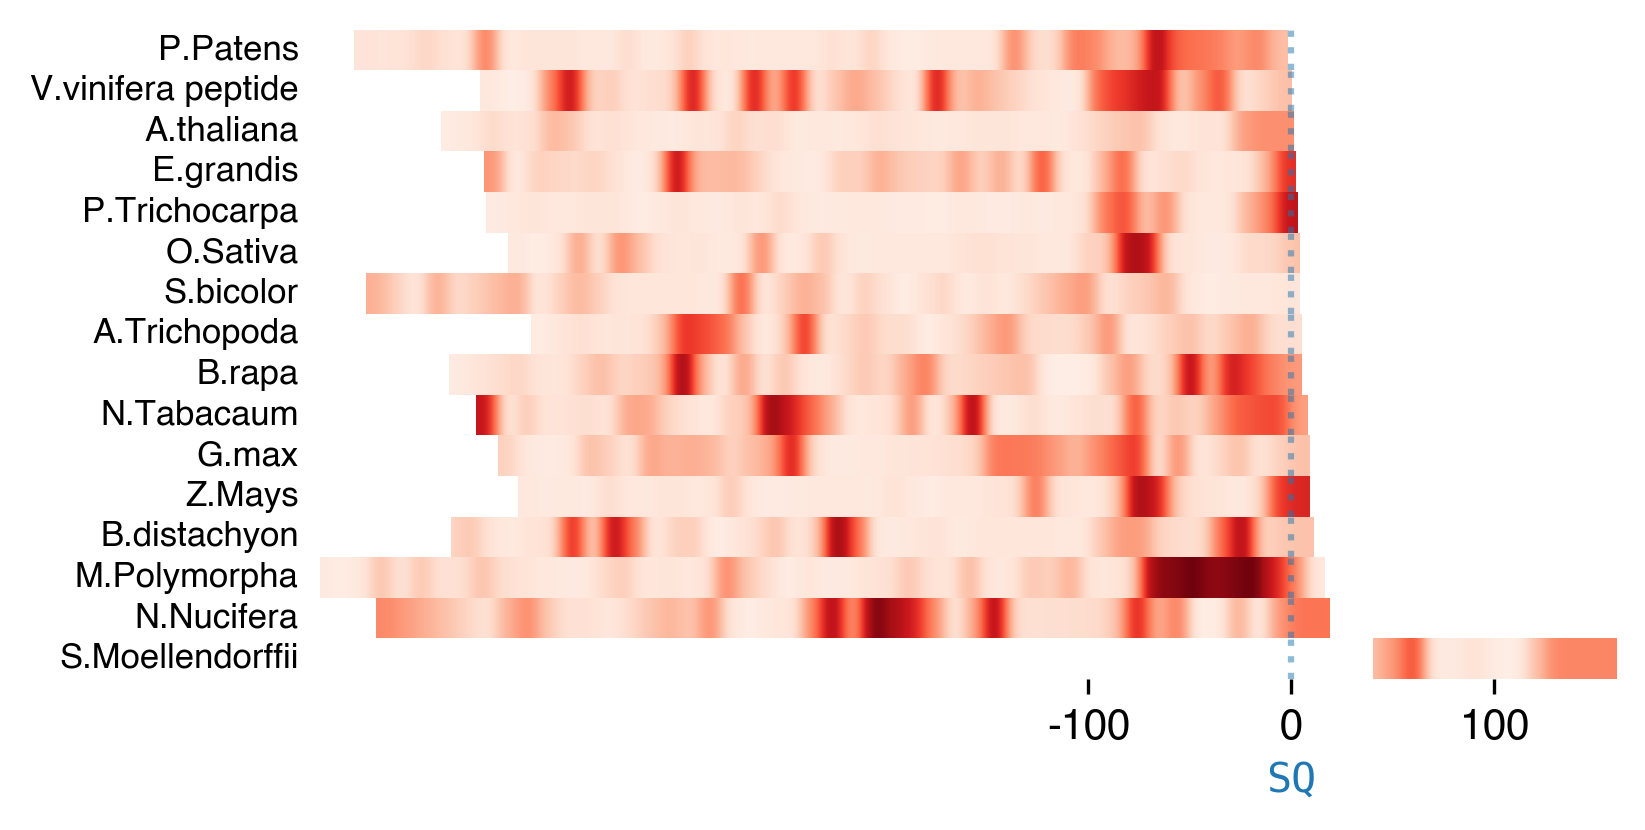

In [930]:
fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (10,2.5), sharex = True, dpi = 300)


end_order = heatmap_df.reset_index().groupby("Description_name").max().sort_values(by = "adj_mid").index

for name, ax in zip(end_order, axs):
    plot_one_trace(name, ax, heatmap_df, plot_min = -479, plot_max = 160)
    ax.axvline(0, alpha = 0.5, linestyle = 'dotted')

#plot_one_trace(name, ax, last)
    

    if name != "BasicMaPo":
        ax.set_xticks([])

axs[-1].set_xticks([-100, 0, 100])
axs[-1].set_xticklabels([-100, 0, 100])
        
axs[-1].text(x = 0, y = -40, va = "top", ha = "center", s = motif_align, color = sns.color_palette("tab10")[0], font = 'monospace')

plt.tight_layout(pad = 0)

In [856]:
heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"]

,Description_name,normalized_Activity_S3_1
adj_mid,,
20,BasicSeMo,NaN
30,BasicSeMo,0.143188
40,BasicSeMo,NaN
50,BasicSeMo,0.345645
60,BasicSeMo,0.610632
70,BasicSeMo,0.061530
80,BasicSeMo,0.065298
90,BasicSeMo,0.116835
100,BasicSeMo,0.056804


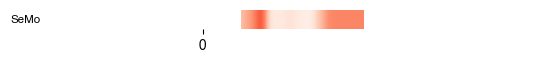

In [803]:
fig, ax = plt.subplots()
#plot_one_trace("BasicSeMo", ax, last = True, )

plot_one_trace("BasicSeMo", ax, heatmap_df)
ax.set_xticks([0])

In [800]:
sog1_orthologs

,Wild type sequences:,Unnamed: 1,name,motif_pos,len
7,Selaginellamoellendorffii(spikemoss)_D8RBR5_TAIR,MSQAPQDWTGLPAGVKFDPNDKEILDHLAAKIGRGGKPHALIDEFI...,Selaginellamoellendorffii(spikemoss),1,172
10,Amborellatrichopoda_W1NK30_TAIR,MVTQDWPGLPRGVKFDPSDQELLGHLAAKVGVDGAKLHPFIDEFIM...,Amborellatrichopoda,391,404
13,ZeaMaysSOG1_Lib1,MTGTTWIIDSQRFATKIKNASGSSDPSKQKWIGNPSKECPKCSHVI...,ZeaMays,397,413
11,OryzaSativaSOG1_Lib1,MTGTSWIIDSHRIASKIKNASGSVDASKHKWVSNPTKACPRCNHII...,OryzaSativa,402,418
6,G.max_Glyma.10G204700.1.p_Macovei,MAGPSWLVDKSRIATKIKNVSGTCGKVIWKSNPSRACPSCHHVIDN...,G.max,407,422
4,PopulusTrichocarpaSOG1_Lib1,MAGPWLVDGNRFATKIKSASSASNHERVAWKSDPCKTCPNCHHVID...,PopulusTrichocarpa,413,428
2,E.grandis_Eucgr.G02349.1.p_Macovei,MAGPSWLVDSHRIATKIRSASGASDPEKVKWKSNPTRACPNCQHVI...,E.grandis,414,429
3,V.vinifera peptide_GSVIVT01011954001_Macovei,MSWLVDSNRFATKIKNASGTRETERVKWKSNPSRACPNCQHIIDNS...,V.vinifera peptide,416,430
5,Nicotianatabacum(tobacco)_A0A1S3X2K2_TAIR,MCYRFRRPSWLVDSKRIATKIKSASGDPGAVNWKSNPTKACPNCQF...,Nicotianatabacum(tobacco),418,440
0,B.rapa_Brara.G00896.1.p_Macovei,MAGRAWLVDKNRIATKILSASDPCPTVWNTNPTRHCPNCHHVIDNS...,B.rapa,431,445


In [ ]:
fig, axs = plt.subplots(len(sog1_orthologs["name"]), 1, figsize = (16,4), sharex = True)

for name, ax in zip(end_order, axs):
    if name == "BasicMaPo":
        last = True
    else:
        last = False

    #last = True
    plot_one_trace(name, ax, last)

axs[-1].text(x = 0, y = -23, va = "top", ha = "left", s = motif_align, color = sns.color_palette('tab10')[0])

plt.tight_layout(pad = 0)

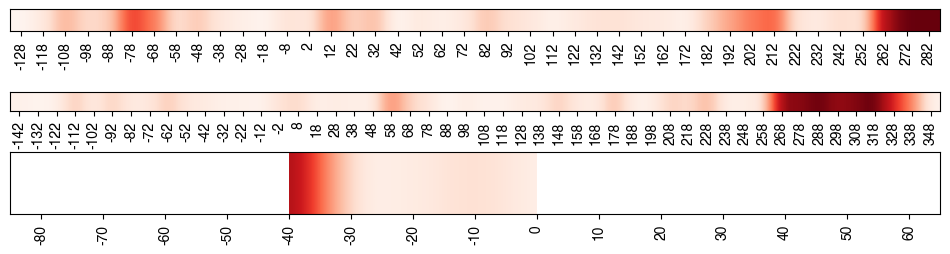

In [257]:
fig, axs = plt.subplots(3, 1, figsize = (12, 3), sharex = False)
axs[0].imshow(df,interpolation="gaussian", cmap = "Reds")
axs[0].set_yticks([]);

#x_label_list=['25', '300', '575', '850', '850', '575', '300', '25']

axs[0].set_xticks(np.arange(len(df.T)));
# axs[0].tick_params()
axs[0].set_xticklabels(df.T.index,rotation=90);


axs[1].imshow(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"][["normalized_Activity_S3_1"]].T,interpolation="quadric", cmap = "Reds")
axs[1].set_yticks([]);
axs[1].set_xticks(np.arange(len(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"])));
axs[1].set_xticklabels(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"].index,rotation=90);


axs[2].imshow(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"][["normalized_Activity_S3_1"]].T,interpolation="quadric", cmap = "Reds")
axs[2].set_yticks([]);

axs[2].set_xticks(np.arange(len(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"])));
axs[2].set_xticklabels(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"].index,rotation=90);


#sns.despine(left = True, bottom = True)
#ax.set_xticks(heatmap_df[heatmap_df["Description_name"] == "BasicArTh"].index);

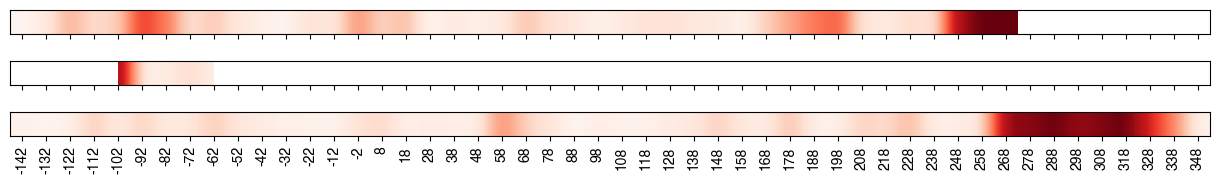

In [302]:
fig, axs = plt.subplots(3, 1, figsize = (12, 2), sharex = True)
axs[0].imshow(df,interpolation="gaussian", cmap = "Reds")
axs[0].set_yticks([]);

#x_label_list=['25', '300', '575', '850', '850', '575', '300', '25']

axs[0].set_xticks(np.arange(len(df.T)));
# axs[0].tick_params()
axs[0].set_xticklabels(df.T.index,rotation=90);


axs[1].imshow(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"][["normalized_Activity_S3_1"]].T,interpolation="quadric", cmap = "Reds")
axs[1].set_yticks([]);

axs[1].set_xticks(np.arange(len(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"])));
axs[1].set_xticklabels(heatmap_df[heatmap_df["Description_name"] == "BasicSeMo"].index,rotation=90);

axs[2].imshow(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"][["normalized_Activity_S3_1"]].T,interpolation="quadric", cmap = "Reds")
axs[2].set_yticks([]);

axs[2].set_xticks(np.arange(len(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"])));
axs[2].set_xticklabels(heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"].index,rotation=90);

plt.tight_layout(pad = 0)
#sns.despine(left = True, bottom = True)
#ax.set_xticks(heatmap_df[heatmap_df["Description_name"] == "BasicArTh"].index);

In [264]:
heatmap_df[heatmap_df["Description_name"] == "BasicMaPo"]

,Description_name,normalized_Activity_S3_1
adj_mid,,
-142,BasicMaPo,0.073415
-132,BasicMaPo,0.057330
-122,BasicMaPo,0.071634
-112,BasicMaPo,0.231455
-102,BasicMaPo,0.098069
-92,BasicMaPo,0.216115
-82,BasicMaPo,0.106944
-72,BasicMaPo,0.122547
-62,BasicMaPo,0.233168


In [221]:
heatmap_df[heatmap_df["Description_name"] == "BasicBrRa"]#["normalized_Activity_S3_1"]].T

,Description_name,normalized_Activity_S3_1
adj_mid,,
-125,BasicBrRa,0.064630
-115,BasicBrRa,NaN
-105,BasicBrRa,0.132925
-95,BasicBrRa,0.164555
-85,BasicBrRa,0.093907
-75,BasicBrRa,0.083910
-65,BasicBrRa,NaN
-55,BasicBrRa,0.249022
-45,BasicBrRa,0.149185


In [197]:
heatmap_df[heatmap_df["Description_name"] == "BasicArTh"][["normalized_Activity_S3_1"]].T

adj_mid,-128,-118,-108,-98,-88,-78,-68,-58,-48,-38,...,192,202,212,222,232,242,252,262,272,282
normalized_Activity_S3_1,0.060741,0.081735,0.150664,0.103307,0.11599,0.268829,0.207608,0.096106,0.127376,0.08597,...,0.163327,0.207418,0.235433,0.091255,0.078845,0.104457,0.08827,0.340424,0.384858,0.385699


In [175]:
max_length = max(heatmap_df.index) - min(heatmap_df.index)
max_length

509

In [179]:
heatmap_matrix = np.zeros((10,max_length))
heatmap_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [166]:
# pd.pivot_table(orthologs_relative_pos[["Description_name", "normalized_Activity_S3_1", "adj_mid"]], 
#                values='normalized_Activity_S3_1', 
#                index=['Description_name'],
#                        columns=['adj_mid'])